Convolutional Dictionary Learning
=================================

This example demonstrates the use of [prlcnscdl.ConvBPDNDictLearn_Consensus](http://sporco.rtfd.org/en/latest/modules/sporco.dictlrn.prlcnscdl.html#sporco.dictlrn.prlcnscdl.ConvBPDNDictLearn_Consensus) for learning a convolutional dictionary from a set of training images. The dictionary learning algorithm is based on the ADMM consensus dictionary update [[1]](http://sporco.rtfd.org/en/latest/zreferences.html#sorel-2016-fast) [[20]](http://sporco.rtfd.org/en/latest/zreferences.html#garcia-2018-convolutional1).

In [1]:
from __future__ import print_function
from builtins import input
from builtins import range

import pyfftw   # See https://github.com/pyFFTW/pyFFTW/issues/40
import numpy as np

from sporco.dictlrn import prlcnscdl
from sporco import util
from sporco import plot
plot.config_notebook_plotting()

Load training images.

In [2]:
exim = util.ExampleImages(scaled=True, zoom=0.25, gray=True)
S1 = exim.image('barbara.png', idxexp=np.s_[10:522, 100:612])
S2 = exim.image('kodim23.png', idxexp=np.s_[:, 60:572])
S3 = exim.image('monarch.png', idxexp=np.s_[:, 160:672])
S4 = exim.image('sail.png', idxexp=np.s_[:, 210:722])
S5 = exim.image('tulips.png', idxexp=np.s_[:, 30:542])
S = np.dstack((S1, S2, S3, S4, S5))

Highpass filter training images.

In [3]:
npd = 16
fltlmbd = 5
sl, sh = util.tikhonov_filter(S, fltlmbd, npd)

Construct initial dictionary.

In [4]:
np.random.seed(12345)
D0 = np.random.randn(8, 8, 64)

Set regularization parameter and options for dictionary learning solver.

In [5]:
lmbda = 0.2
opt = prlcnscdl.ConvBPDNDictLearn_Consensus.Options({'Verbose': True,
                        'MaxMainIter': 200,
                        'CBPDN': {'rho': 50.0*lmbda + 0.5},
                        'CCMOD': {'rho': 1.0, 'ZeroMean': True}})

Create solver object and solve.

In [6]:
d = prlcnscdl.ConvBPDNDictLearn_Consensus(D0, sh, lmbda, opt)
D1 = d.solve()
print("ConvBPDNDictLearn_Consensus solve time: %.2fs" %
      d.timer.elapsed('solve'))

Itn   Fnc       DFid      Regℓ1   
----------------------------------


   0  4.42e+02  4.42e+02  2.89e-01
   1  4.22e+02  4.11e+02  5.31e+01


   2  3.64e+02  3.07e+02  2.85e+02
   3  3.37e+02  2.11e+02  6.29e+02


   4  3.27e+02  1.53e+02  8.70e+02
   5  3.16e+02  1.23e+02  9.66e+02


   6  3.02e+02  1.12e+02  9.53e+02
   7  2.90e+02  1.11e+02  8.92e+02


   8  2.82e+02  1.14e+02  8.36e+02
   9  2.76e+02  1.17e+02  7.98e+02


  10  2.73e+02  1.17e+02  7.82e+02
  11  2.71e+02  1.15e+02  7.75e+02


  12  2.68e+02  1.13e+02  7.76e+02
  13  2.67e+02  1.11e+02  7.78e+02


  14  2.65e+02  1.09e+02  7.80e+02
  15  2.64e+02  1.08e+02  7.81e+02


  16  2.63e+02  1.07e+02  7.80e+02
  17  2.62e+02  1.06e+02  7.78e+02


  18  2.61e+02  1.06e+02  7.76e+02
  19  2.60e+02  1.05e+02  7.73e+02


  20  2.59e+02  1.05e+02  7.71e+02
  21  2.59e+02  1.05e+02  7.68e+02


  22  2.58e+02  1.05e+02  7.66e+02
  23  2.57e+02  1.04e+02  7.65e+02


  24  2.57e+02  1.04e+02  7.64e+02
  25  2.56e+02  1.04e+02  7.63e+02


  26  2.56e+02  1.04e+02  7.62e+02
  27  2.56e+02  1.03e+02  7.62e+02


  28  2.55e+02  1.03e+02  7.61e+02
  29  2.55e+02  1.03e+02  7.60e+02


  30  2.55e+02  1.03e+02  7.59e+02
  31  2.54e+02  1.02e+02  7.59e+02


  32  2.54e+02  1.02e+02  7.58e+02
  33  2.54e+02  1.02e+02  7.57e+02


  34  2.53e+02  1.02e+02  7.56e+02
  35  2.53e+02  1.02e+02  7.56e+02


  36  2.53e+02  1.02e+02  7.55e+02
  37  2.53e+02  1.02e+02  7.54e+02


  38  2.52e+02  1.01e+02  7.54e+02
  39  2.52e+02  1.01e+02  7.53e+02


  40  2.52e+02  1.01e+02  7.53e+02
  41  2.52e+02  1.01e+02  7.52e+02


  42  2.51e+02  1.01e+02  7.52e+02
  43  2.51e+02  1.01e+02  7.52e+02


  44  2.51e+02  1.01e+02  7.51e+02
  45  2.51e+02  1.01e+02  7.51e+02


  46  2.51e+02  1.01e+02  7.50e+02
  47  2.50e+02  1.01e+02  7.50e+02


  48  2.50e+02  1.00e+02  7.49e+02
  49  2.50e+02  1.00e+02  7.49e+02


  50  2.50e+02  1.00e+02  7.48e+02
  51  2.50e+02  1.00e+02  7.48e+02


  52  2.50e+02  1.00e+02  7.48e+02
  53  2.50e+02  1.00e+02  7.47e+02


  54  2.49e+02  1.00e+02  7.47e+02
  55  2.49e+02  1.00e+02  7.46e+02


  56  2.49e+02  1.00e+02  7.46e+02
  57  2.49e+02  9.99e+01  7.46e+02


  58  2.49e+02  9.99e+01  7.45e+02
  59  2.49e+02  9.98e+01  7.45e+02


  60  2.49e+02  9.98e+01  7.45e+02
  61  2.49e+02  9.97e+01  7.44e+02


  62  2.48e+02  9.97e+01  7.44e+02
  63  2.48e+02  9.96e+01  7.44e+02


  64  2.48e+02  9.96e+01  7.43e+02


  65  2.48e+02  9.96e+01  7.43e+02
  66  2.48e+02  9.95e+01  7.43e+02


  67  2.48e+02  9.94e+01  7.43e+02
  68  2.48e+02  9.94e+01  7.42e+02


  69  2.48e+02  9.93e+01  7.42e+02
  70  2.48e+02  9.93e+01  7.42e+02


  71  2.48e+02  9.93e+01  7.42e+02
  72  2.48e+02  9.92e+01  7.42e+02


  73  2.47e+02  9.92e+01  7.41e+02
  74  2.47e+02  9.91e+01  7.41e+02


  75  2.47e+02  9.91e+01  7.41e+02
  76  2.47e+02  9.90e+01  7.41e+02


  77  2.47e+02  9.90e+01  7.41e+02
  78  2.47e+02  9.89e+01  7.41e+02


  79  2.47e+02  9.89e+01  7.40e+02
  80  2.47e+02  9.89e+01  7.40e+02


  81  2.47e+02  9.88e+01  7.40e+02
  82  2.47e+02  9.88e+01  7.40e+02


  83  2.47e+02  9.88e+01  7.40e+02
  84  2.47e+02  9.87e+01  7.40e+02


  85  2.47e+02  9.87e+01  7.40e+02
  86  2.47e+02  9.86e+01  7.39e+02


  87  2.46e+02  9.86e+01  7.39e+02
  88  2.46e+02  9.86e+01  7.39e+02


  89  2.46e+02  9.85e+01  7.39e+02
  90  2.46e+02  9.85e+01  7.39e+02


  91  2.46e+02  9.85e+01  7.39e+02
  92  2.46e+02  9.84e+01  7.39e+02


  93  2.46e+02  9.84e+01  7.39e+02
  94  2.46e+02  9.84e+01  7.38e+02


  95  2.46e+02  9.84e+01  7.38e+02
  96  2.46e+02  9.83e+01  7.38e+02


  97  2.46e+02  9.83e+01  7.38e+02
  98  2.46e+02  9.83e+01  7.38e+02


  99  2.46e+02  9.82e+01  7.38e+02
 100  2.46e+02  9.82e+01  7.38e+02


 101  2.46e+02  9.82e+01  7.38e+02
 102  2.46e+02  9.82e+01  7.37e+02


 103  2.46e+02  9.82e+01  7.37e+02
 104  2.46e+02  9.82e+01  7.37e+02


 105  2.46e+02  9.81e+01  7.37e+02
 106  2.45e+02  9.81e+01  7.37e+02


 107  2.45e+02  9.81e+01  7.37e+02
 108  2.45e+02  9.81e+01  7.37e+02


 109  2.45e+02  9.81e+01  7.36e+02
 110  2.45e+02  9.81e+01  7.36e+02


 111  2.45e+02  9.80e+01  7.36e+02
 112  2.45e+02  9.80e+01  7.36e+02


 113  2.45e+02  9.80e+01  7.36e+02
 114  2.45e+02  9.80e+01  7.36e+02


 115  2.45e+02  9.80e+01  7.36e+02
 116  2.45e+02  9.80e+01  7.36e+02


 117  2.45e+02  9.79e+01  7.35e+02
 118  2.45e+02  9.79e+01  7.35e+02


 119  2.45e+02  9.79e+01  7.35e+02
 120  2.45e+02  9.79e+01  7.35e+02


 121  2.45e+02  9.79e+01  7.35e+02
 122  2.45e+02  9.79e+01  7.35e+02


 123  2.45e+02  9.79e+01  7.35e+02
 124  2.45e+02  9.79e+01  7.34e+02


 125  2.45e+02  9.78e+01  7.34e+02
 126  2.45e+02  9.78e+01  7.34e+02


 127  2.45e+02  9.78e+01  7.34e+02
 128  2.45e+02  9.78e+01  7.34e+02


 129  2.45e+02  9.78e+01  7.34e+02
 130  2.45e+02  9.78e+01  7.34e+02


 131  2.45e+02  9.78e+01  7.34e+02
 132  2.44e+02  9.77e+01  7.34e+02


 133  2.44e+02  9.77e+01  7.34e+02
 134  2.44e+02  9.77e+01  7.33e+02


 135  2.44e+02  9.77e+01  7.33e+02
 136  2.44e+02  9.77e+01  7.33e+02


 137  2.44e+02  9.77e+01  7.33e+02
 138  2.44e+02  9.77e+01  7.33e+02


 139  2.44e+02  9.77e+01  7.33e+02
 140  2.44e+02  9.77e+01  7.33e+02


 141  2.44e+02  9.76e+01  7.33e+02
 142  2.44e+02  9.76e+01  7.33e+02


 143  2.44e+02  9.76e+01  7.33e+02
 144  2.44e+02  9.76e+01  7.32e+02


 145  2.44e+02  9.76e+01  7.32e+02
 146  2.44e+02  9.76e+01  7.32e+02


 147  2.44e+02  9.76e+01  7.32e+02
 148  2.44e+02  9.76e+01  7.32e+02


 149  2.44e+02  9.75e+01  7.32e+02
 150  2.44e+02  9.75e+01  7.32e+02


 151  2.44e+02  9.75e+01  7.32e+02
 152  2.44e+02  9.75e+01  7.32e+02


 153  2.44e+02  9.75e+01  7.32e+02
 154  2.44e+02  9.75e+01  7.32e+02


 155  2.44e+02  9.75e+01  7.32e+02
 156  2.44e+02  9.74e+01  7.32e+02


 157  2.44e+02  9.74e+01  7.32e+02
 158  2.44e+02  9.74e+01  7.31e+02


 159  2.44e+02  9.74e+01  7.31e+02
 160  2.44e+02  9.74e+01  7.31e+02


 161  2.44e+02  9.74e+01  7.31e+02
 162  2.44e+02  9.74e+01  7.31e+02


 163  2.44e+02  9.73e+01  7.31e+02
 164  2.44e+02  9.73e+01  7.31e+02


 165  2.44e+02  9.73e+01  7.31e+02
 166  2.43e+02  9.73e+01  7.31e+02


 167  2.43e+02  9.73e+01  7.31e+02
 168  2.43e+02  9.73e+01  7.31e+02


 169  2.43e+02  9.73e+01  7.31e+02
 170  2.43e+02  9.73e+01  7.31e+02


 171  2.43e+02  9.73e+01  7.31e+02
 172  2.43e+02  9.72e+01  7.30e+02


 173  2.43e+02  9.72e+01  7.30e+02
 174  2.43e+02  9.72e+01  7.30e+02


 175  2.43e+02  9.72e+01  7.30e+02
 176  2.43e+02  9.72e+01  7.30e+02


 177  2.43e+02  9.72e+01  7.30e+02
 178  2.43e+02  9.72e+01  7.30e+02


 179  2.43e+02  9.72e+01  7.30e+02
 180  2.43e+02  9.72e+01  7.30e+02


 181  2.43e+02  9.72e+01  7.30e+02
 182  2.43e+02  9.72e+01  7.29e+02


 183  2.43e+02  9.72e+01  7.29e+02
 184  2.43e+02  9.72e+01  7.29e+02


 185  2.43e+02  9.72e+01  7.29e+02
 186  2.43e+02  9.72e+01  7.29e+02


 187  2.43e+02  9.72e+01  7.29e+02
 188  2.43e+02  9.71e+01  7.29e+02


 189  2.43e+02  9.71e+01  7.29e+02
 190  2.43e+02  9.71e+01  7.29e+02


 191  2.43e+02  9.71e+01  7.29e+02
 192  2.43e+02  9.71e+01  7.28e+02


 193  2.43e+02  9.71e+01  7.28e+02
 194  2.43e+02  9.71e+01  7.28e+02


 195  2.43e+02  9.71e+01  7.28e+02
 196  2.43e+02  9.71e+01  7.28e+02


 197  2.43e+02  9.71e+01  7.28e+02
 198  2.43e+02  9.71e+01  7.28e+02


 199  2.43e+02  9.71e+01  7.28e+02
----------------------------------
ConvBPDNDictLearn_Consensus solve time: 32.88s


Display initial and final dictionaries.

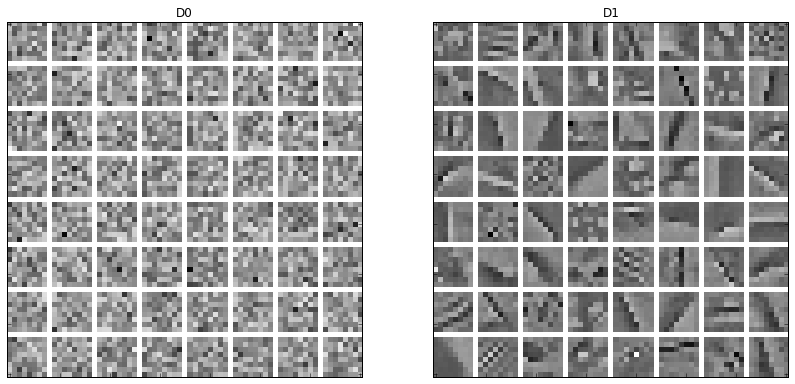

In [7]:
D1 = D1.squeeze()
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(util.tiledict(D0), title='D0', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(util.tiledict(D1), title='D1', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value

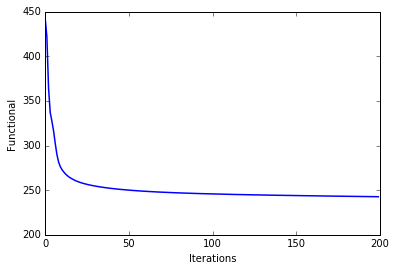

In [8]:
its = d.getitstat()
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional')